In [18]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('./datasets/final_features.csv')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DATE                     555 non-null    object 
 1   PMI                      555 non-null    float64
 2   VIXCLS                   555 non-null    float64
 3   DGS2                     555 non-null    float64
 4   real_rate                555 non-null    float64
 5   LNG_future_Adj Close     555 non-null    float64
 6   Gold_future_Adj Close    555 non-null    float64
 7   Silver_future_Adj Close  555 non-null    float64
 8   Copper_future_Adj Close  555 non-null    float64
 9   WTI_oil_Adj Close        555 non-null    float64
 10  Brent_oil_Adj Close      555 non-null    float64
 11  Corn_future_Adj Close    555 non-null    float64
 12  Wheat_future_Adj Close   555 non-null    float64
 13  DTB3                     555 non-null    float64
 14  USD/KRW_Adj Close        5

## 시계열 인덱스 변경

In [21]:
# 기존 인덱스를 삭제하고 DATE컬럼을 시계열 인덱스로 변경
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)  # 'DATE' 컬럼을 인덱스로 설정

## 데이터 분포 확인(EDA)

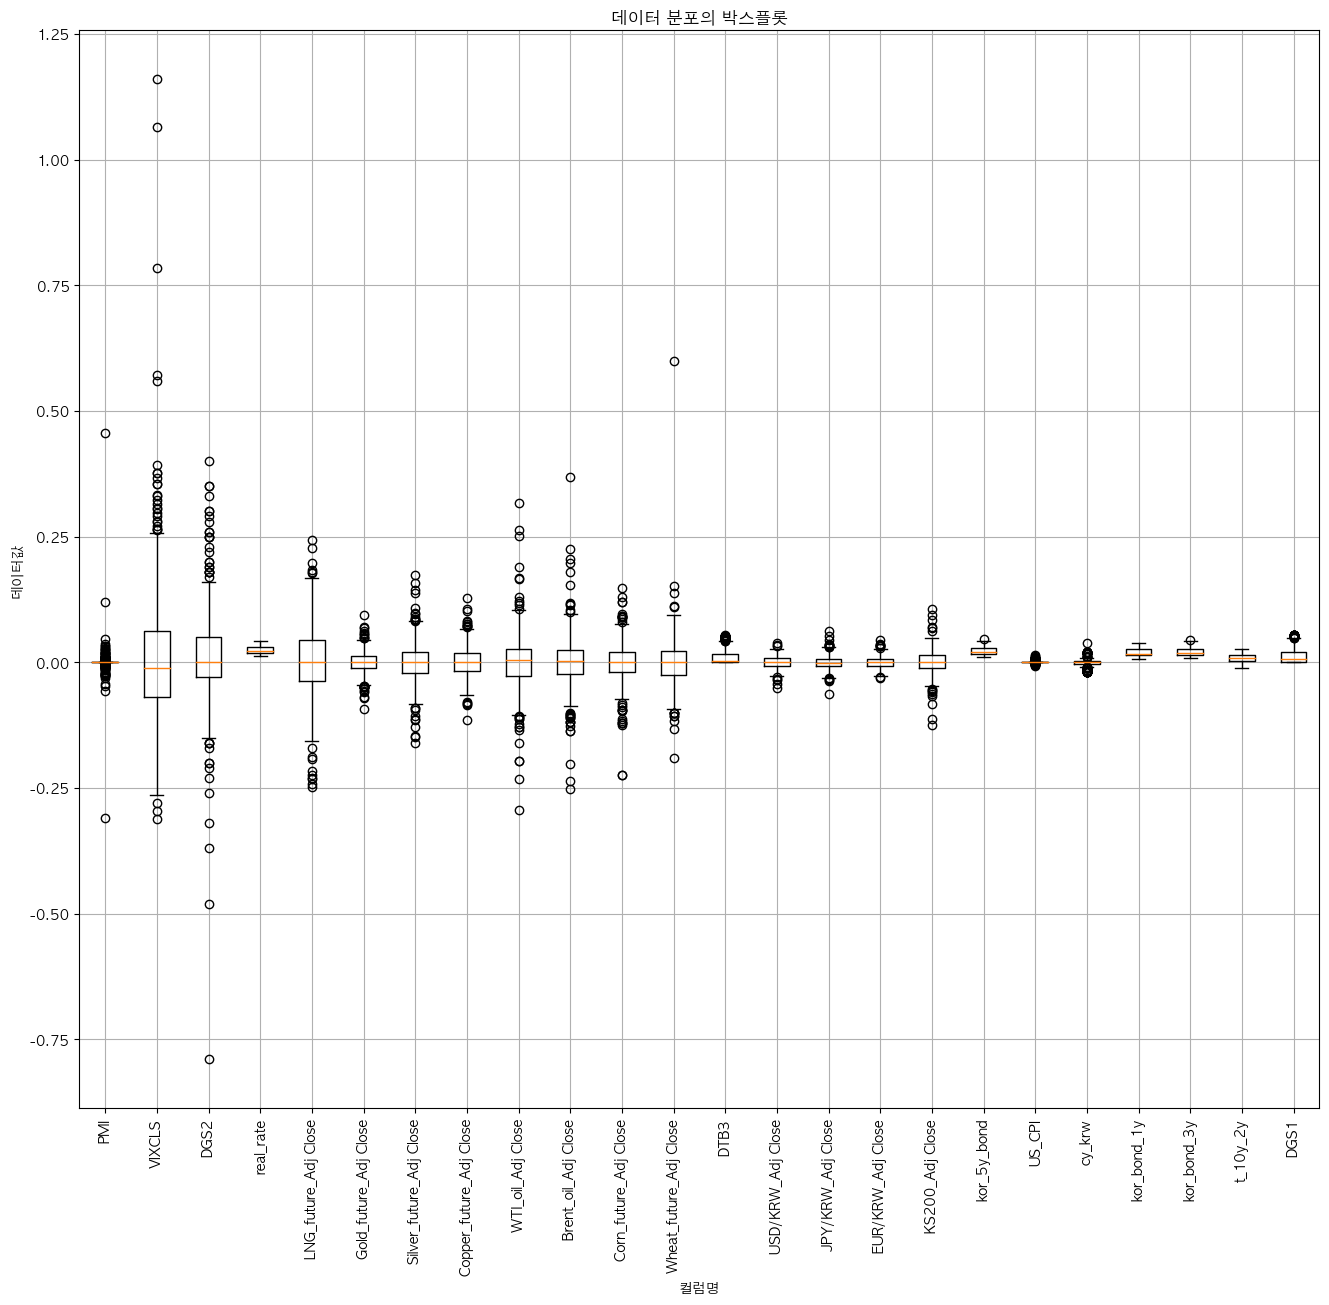

In [22]:
x_labels = data.columns

plt.rcParams['font.family'] = 'AppleGothic'
# 박스플롯 그래프 그리기
plt.figure(figsize=(16, 14))
plt.boxplot(data.values, vert=True)  # 박스플롯의 방향을 세로(90도 회전)로 변경
plt.xticks(range(1, len(x_labels) + 1), x_labels, rotation=90)  # x 축 라벨을 90도 회전
plt.title("데이터 분포의 박스플롯")
plt.xlabel("컬럼명")
plt.ylabel("데이터값")
plt.grid(True)
plt.show()

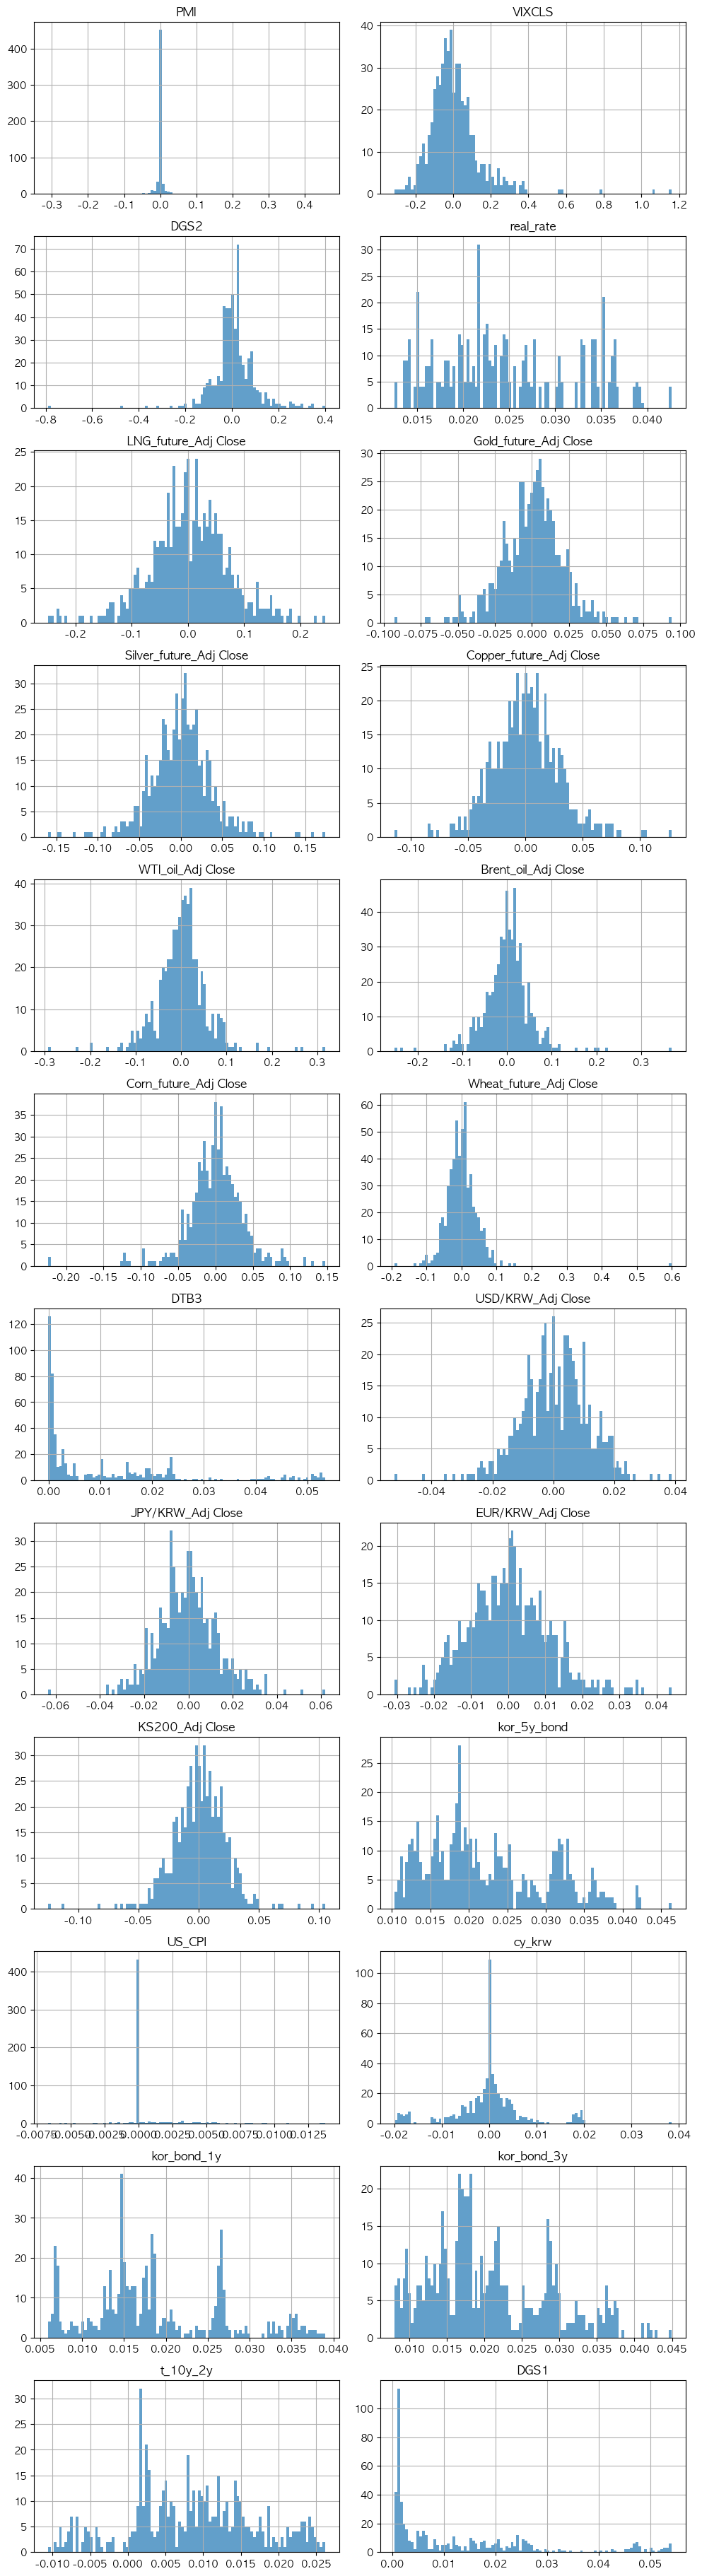

In [23]:
plt.rcParams['font.family'] = 'AppleGothic'
# 데이터 분포 확인
plt.figure(figsize=(10, 100))
for i, column in enumerate(data.columns, 1):
    plt.subplot(33, 2, i)
    plt.hist(data[column], bins=100, alpha=0.7)
    plt.title(column)
    plt.grid(True)

plt.tight_layout()
plt.show()

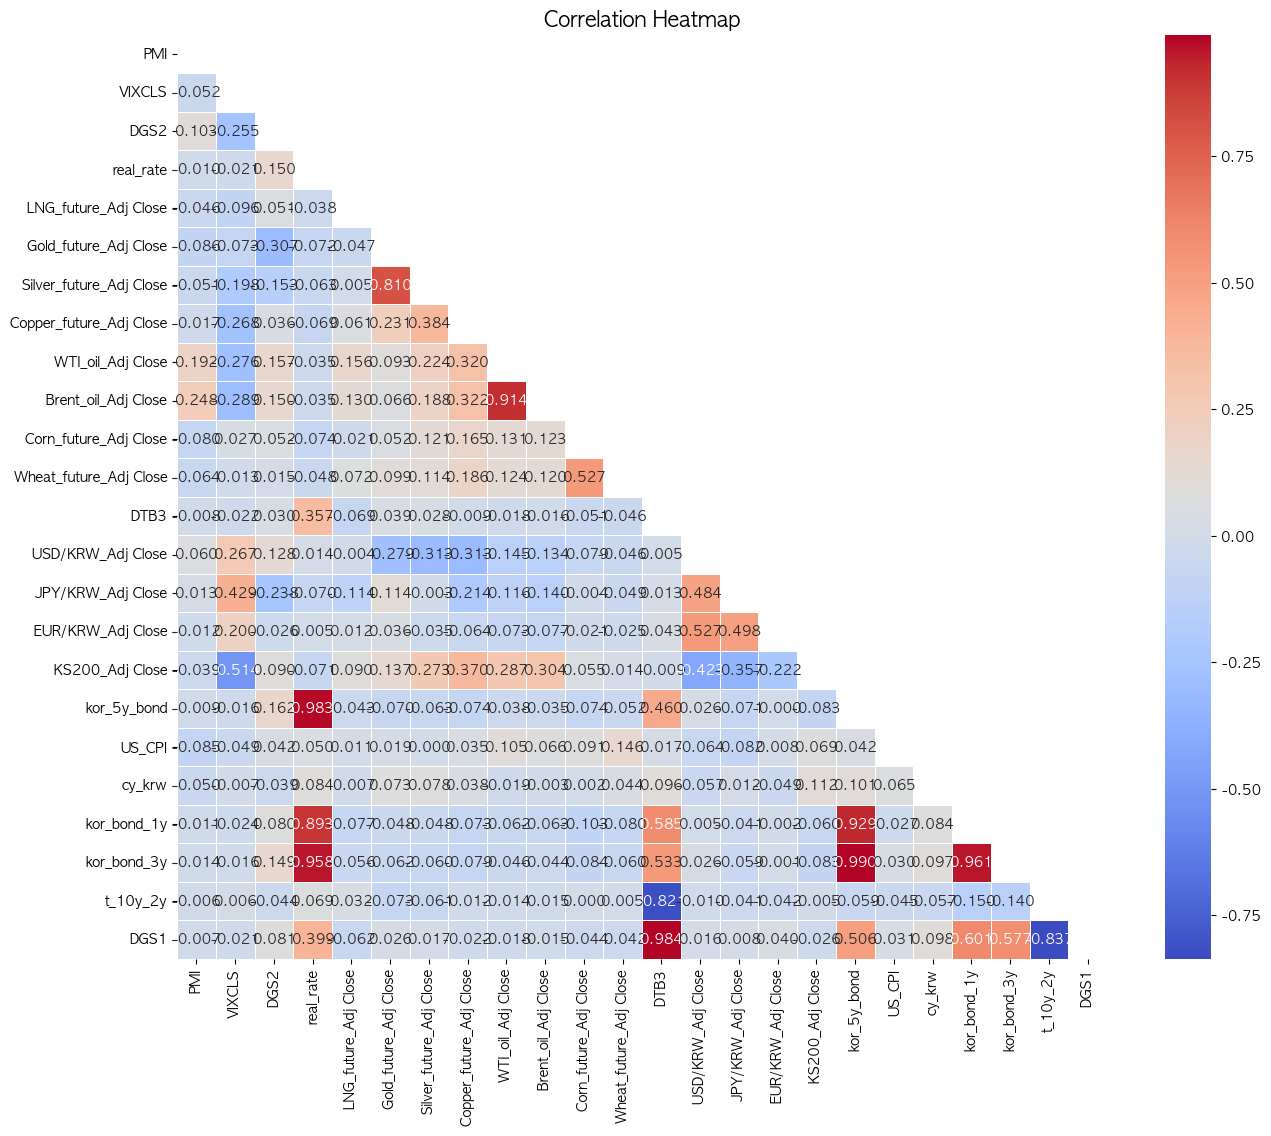

{('kor_5y_bond', 'kor_bond_3y'): 0.99,
 ('DGS1', 'DTB3'): 0.984,
 ('kor_5y_bond', 'real_rate'): 0.983,
 ('kor_bond_1y', 'kor_bond_3y'): 0.961,
 ('kor_bond_3y', 'real_rate'): 0.958,
 ('kor_5y_bond', 'kor_bond_1y'): 0.929,
 ('Brent_oil_Adj Close', 'WTI_oil_Adj Close'): 0.914,
 ('kor_bond_1y', 'real_rate'): 0.893,
 ('DGS1', 't_10y_2y'): -0.837,
 ('DTB3', 't_10y_2y'): -0.821,
 ('Gold_future_Adj Close', 'Silver_future_Adj Close'): 0.81}

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

# 상관계수 행렬 계산
corr_matrix = data.corr()

# 상관계수 행렬의 아래쪽을 NaN으로 채우기 (대각선을 기준으로)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 히트맵 생성
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".3f", cmap='coolwarm', linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap", fontsize=15)
plt.show()

# 절대값이 0.7 이상인 상관계수를 가지는 컬럼 쌍 찾기
significant_corr_pairs = {}
for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        if col == idx:  # 같은 컬럼 간의 상관계수는 무시
            continue
        if abs(corr_matrix[col][idx]) >= 0.7:
            # 중복되는 쌍을 피하기 위해 정렬 후 튜플로 변환
            pair = tuple(sorted([col, idx]))
            if pair not in significant_corr_pairs:
                significant_corr_pairs[pair] = round(corr_matrix[col][idx], 3)


# 상관계수 값을 기준으로 딕셔너리 정렬
sorted_corr_pairs = dict(sorted(significant_corr_pairs.items(), key=lambda item: abs(item[1]), reverse=True))

sorted_corr_pairs

## 데이터 스케일링

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [26]:
data.columns

Index(['PMI', 'VIXCLS', 'DGS2', 'real_rate', 'LNG_future_Adj Close',
       'Gold_future_Adj Close', 'Silver_future_Adj Close',
       'Copper_future_Adj Close', 'WTI_oil_Adj Close', 'Brent_oil_Adj Close',
       'Corn_future_Adj Close', 'Wheat_future_Adj Close', 'DTB3',
       'USD/KRW_Adj Close', 'JPY/KRW_Adj Close', 'EUR/KRW_Adj Close',
       'KS200_Adj Close', 'kor_5y_bond', 'US_CPI', 'cy_krw', 'kor_bond_1y',
       'kor_bond_3y', 't_10y_2y', 'DGS1'],
      dtype='object')

In [27]:
data.head()

,PMI,VIXCLS,DGS2,real_rate,LNG_future_Adj Close,Gold_future_Adj Close,Silver_future_Adj Close,Copper_future_Adj Close,WTI_oil_Adj Close,Brent_oil_Adj Close,...,JPY/KRW_Adj Close,EUR/KRW_Adj Close,KS200_Adj Close,kor_5y_bond,US_CPI,cy_krw,kor_bond_1y,kor_bond_3y,t_10y_2y,DGS1
DATE,,,,,,,,,,,,,,,,,,,,,
2013-01-18,0.000000,-0.022771,0.00,0.030440,0.071836,0.016024,0.050548,0.006594,0.021377,-0.000271,...,-0.006920,0.007442,-0.006114,0.0285,0.00000,-0.000851,0.0272,0.0275,0.0161,0.0014
2013-01-25,0.000000,-0.051601,0.02,0.030440,-0.034212,-0.017906,-0.022632,-0.006551,0.003349,0.024139,...,0.002549,0.010514,-0.021589,0.0282,0.00000,-0.005158,0.0271,0.0271,0.0170,0.0015
2013-02-01,0.001961,0.083891,-0.01,0.030367,-0.041521,0.007848,0.024439,0.037368,0.019712,0.030720,...,0.005001,0.036556,0.006170,0.0290,0.00819,-0.005074,0.0275,0.0276,0.0177,0.0015
2013-02-08,0.000000,-0.000877,-0.02,0.030367,-0.008785,-0.002037,-0.016186,-0.005827,-0.020968,0.018328,...,-0.018892,-0.014746,-0.002135,0.0284,0.00000,-0.005421,0.0270,0.0272,0.0174,0.0014
2013-02-15,0.000000,-0.067916,0.04,0.030367,-0.036369,-0.034334,-0.050469,-0.005994,0.001463,-0.002691,...,0.002751,-0.006897,0.017581,0.0284,0.00000,0.005223,0.0269,0.0272,0.0172,0.0017


In [28]:
# MinMaxScaler
minmax_scalers = MinMaxScaler()
mm_data = minmax_scalers.fit_transform(data)
data_minmax = pd.DataFrame(data=mm_data, columns = ['PMI', 'VIXCLS', 'DGS2', 'real_rate', 'LNG_future_Adj Close',
       'Gold_future_Adj Close', 'Silver_future_Adj Close',
       'Copper_future_Adj Close', 'WTI_oil_Adj Close', 'Brent_oil_Adj Close',
       'Corn_future_Adj Close', 'Wheat_future_Adj Close', 'DTB3',
       'USD/KRW_Adj Close', 'JPY/KRW_Adj Close', 'EUR/KRW_Adj Close',
       'KS200_Adj Close', 'kor_5y_bond', 'US_CPI', 'cy_krw', 'kor_bond_1y',
       'kor_bond_3y', 't_10y_2y', 'DGS1'])

In [29]:
# StandardScaler
standard_scalers = StandardScaler()
std_data = standard_scalers.fit_transform(data)
data_standard = pd.DataFrame(data=std_data, columns = ['PMI', 'VIXCLS', 'DGS2', 'real_rate', 'LNG_future_Adj Close',
       'Gold_future_Adj Close', 'Silver_future_Adj Close',
       'Copper_future_Adj Close', 'WTI_oil_Adj Close', 'Brent_oil_Adj Close',
       'Corn_future_Adj Close', 'Wheat_future_Adj Close', 'DTB3',
       'USD/KRW_Adj Close', 'JPY/KRW_Adj Close', 'EUR/KRW_Adj Close',
       'KS200_Adj Close', 'kor_5y_bond', 'US_CPI', 'cy_krw', 'kor_bond_1y',
       'kor_bond_3y', 't_10y_2y', 'DGS1'])

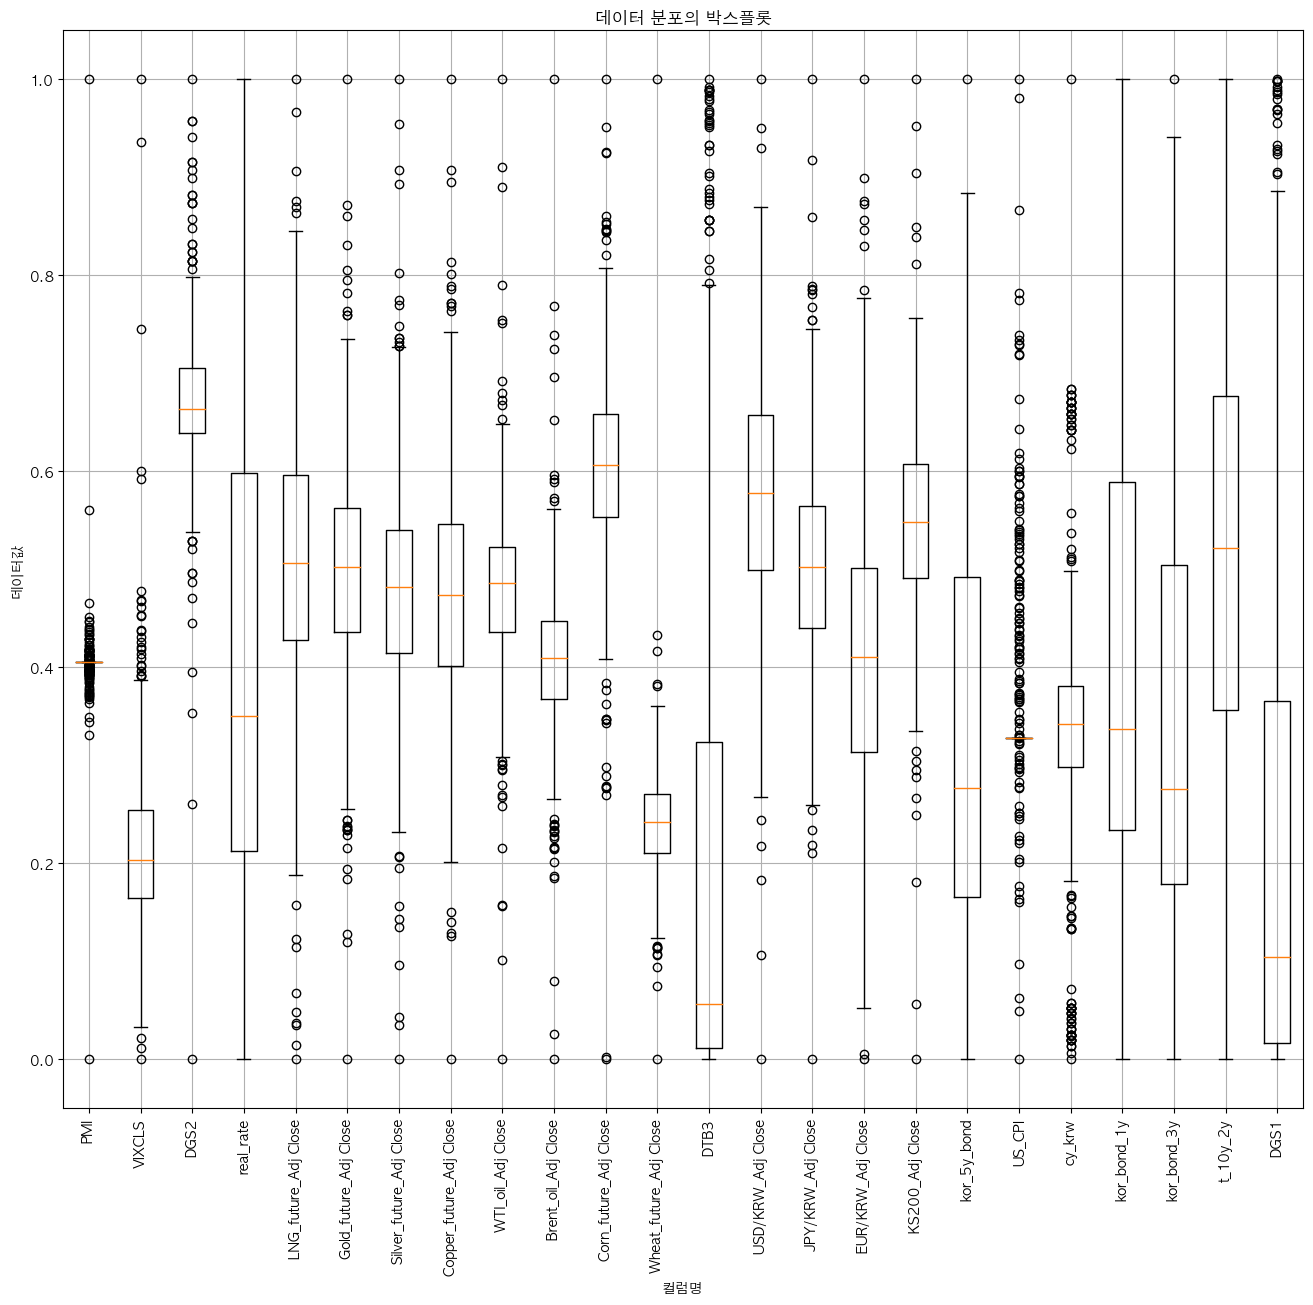

In [30]:
# min-max 후 데이터 분포 확인
x_labels = data_minmax.columns

plt.rcParams['font.family'] = 'AppleGothic'
# 박스플롯 그래프 그리기
plt.figure(figsize=(16, 14))
plt.boxplot(data_minmax.values, vert=True)  # 박스플롯의 방향을 세로(90도 회전)로 변경
plt.xticks(range(1, len(x_labels) + 1), x_labels, rotation=90)  # x 축 라벨을 90도 회전
plt.title("데이터 분포의 박스플롯")
plt.xlabel("컬럼명")
plt.ylabel("데이터값")
plt.grid(True)
plt.show()

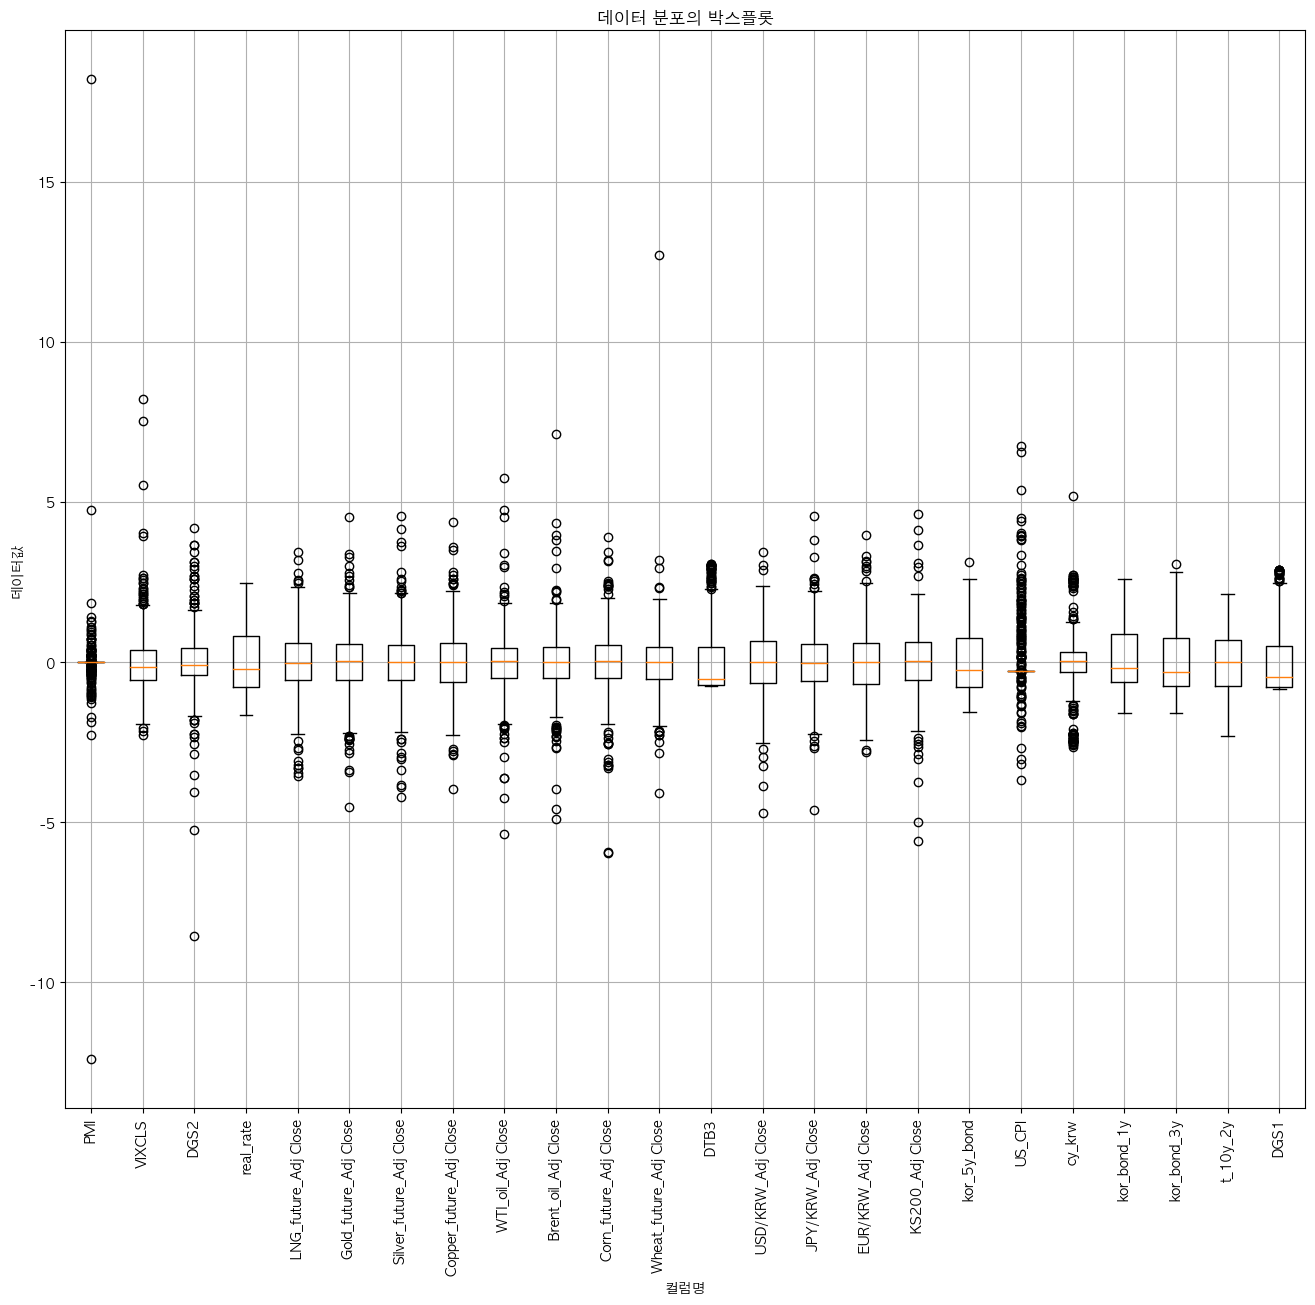

In [31]:
# standard 후 데이터 분포 확인
x_labels = data_standard.columns

plt.rcParams['font.family'] = 'AppleGothic'
# 박스플롯 그래프 그리기
plt.figure(figsize=(16, 14))
plt.boxplot(data_standard.values, vert=True)  # 박스플롯의 방향을 세로(90도 회전)로 변경
plt.xticks(range(1, len(x_labels) + 1), x_labels, rotation=90)  # x 축 라벨을 90도 회전
plt.title("데이터 분포의 박스플롯")
plt.xlabel("컬럼명")
plt.ylabel("데이터값")
plt.grid(True)
plt.show()

## K-Means군집화로 군집 나누기

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [33]:
# 원데이터
kmeans = KMeans(n_clusters=2, random_state=42)
data_kmeans_labels = kmeans.fit_predict(data)

# Min-Max
kmeans = KMeans(n_clusters=2, random_state=42)
minmax_kmeans_labels = kmeans.fit_predict(data_minmax)

# Standard
kmeans = KMeans(n_clusters=2, random_state=42)
standard_kmeans_labels = kmeans.fit_predict(data_standard)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [34]:
# 분류된 결과 확인(군집별 몇개인지)

# 원데이터
data_kmeans_value_counts = pd.Series(data_kmeans_labels).value_counts()
print("원데이터 KMeans 클러스터링 결과:")
print(data_kmeans_value_counts, '\n')

# Min-Max
minmax_kmeans_value_counts = pd.Series(minmax_kmeans_labels).value_counts()
print("Min-Max 데이터 KMeans 클러스터링 결과:")
print(minmax_kmeans_value_counts, '\n')

# Standard
standard_kmeans_value_counts = pd.Series(standard_kmeans_labels).value_counts()
print("Standard 데이터 KMeans 클러스터링 결과:")
print(standard_kmeans_value_counts, '\n')

원데이터 KMeans 클러스터링 결과:
0    468
1     87
Name: count, dtype: int64 

Min-Max 데이터 KMeans 클러스터링 결과:
0    490
1     65
Name: count, dtype: int64 

Standard 데이터 KMeans 클러스터링 결과:
0    489
1     66
Name: count, dtype: int64 



## 차원축소로 시각화

In [35]:
from sklearn.decomposition import PCA

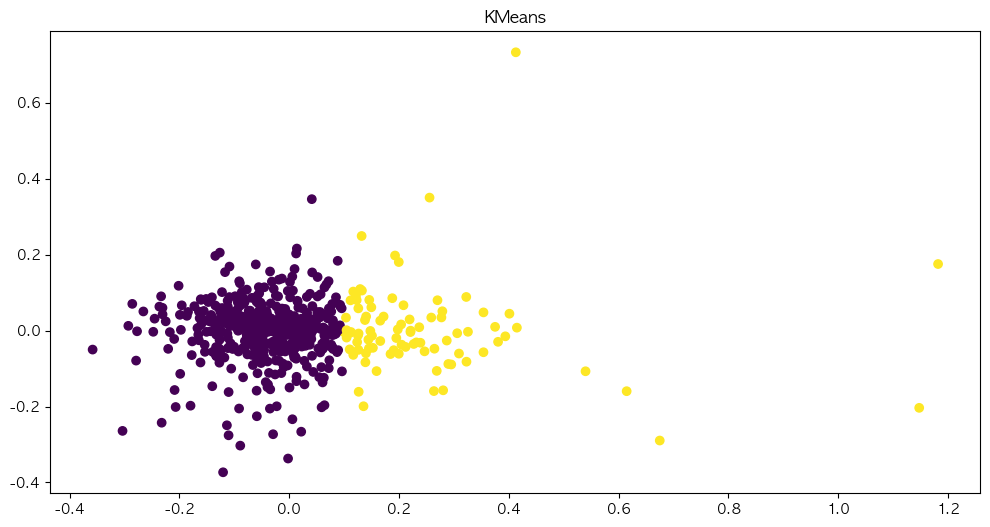

In [36]:
# 원데이터
# PCA를 사용한 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)

# 시각화 (PCA를 사용하여 2차원으로 시각화)
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data_kmeans_labels, cmap='viridis')
plt.title('KMeans')

plt.show()

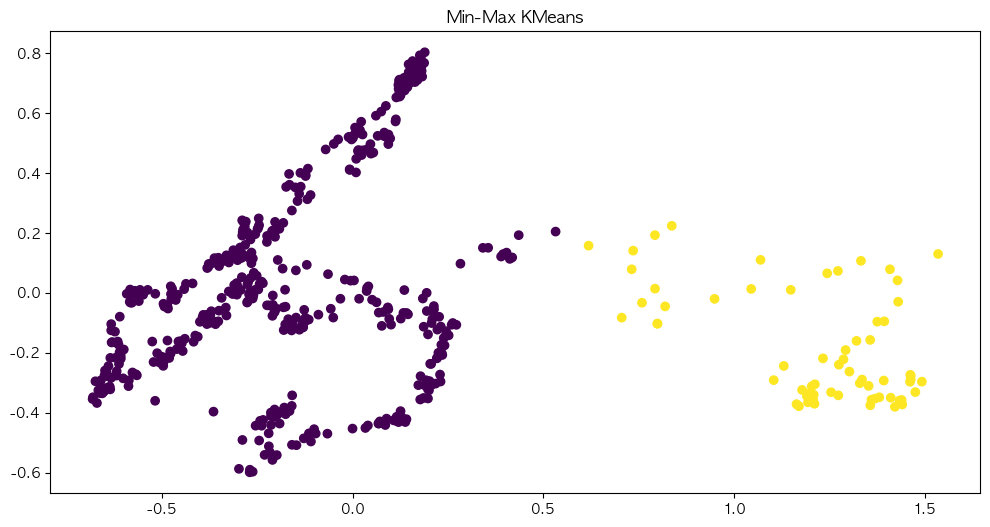

In [37]:
# Min-Max
# PCA를 사용한 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_minmax)

# 시각화 (PCA를 사용하여 2차원으로 시각화)
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=minmax_kmeans_labels, cmap='viridis')
plt.title('Min-Max KMeans')

plt.show()

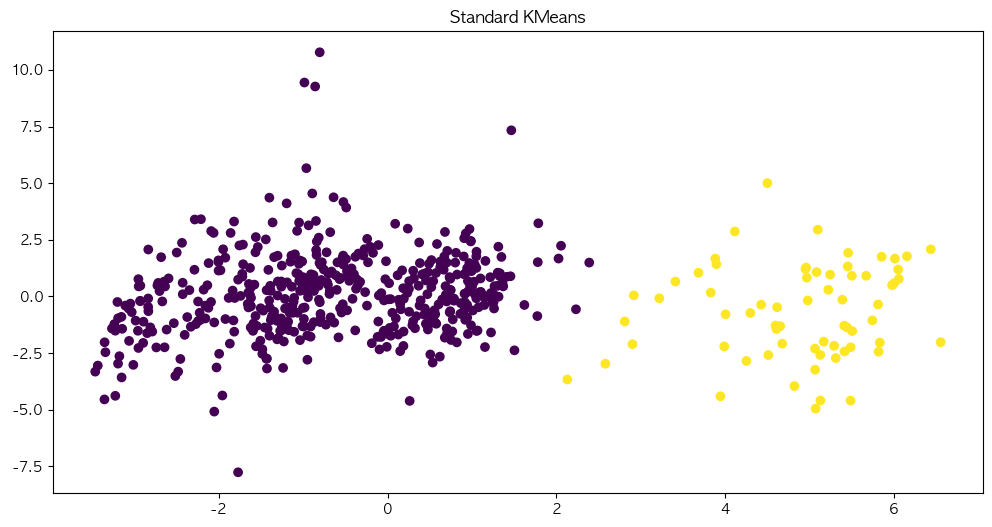

In [38]:
# Standard
# PCA를 사용한 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_standard)

# 시각화 (PCA를 사용하여 2차원으로 시각화)
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=standard_kmeans_labels, cmap='viridis')
plt.title('Standard KMeans')

plt.show()

## 군집을 레이블로 해서 파일로 저장

In [39]:
# 각 데이터프레임에 label값 추가
data['label'] = data_kmeans_labels
data_minmax['label'] = minmax_kmeans_labels
data_standard['label'] = standard_kmeans_labels

In [40]:
# 두 데이터 프레임에 DATE(시계열) 인덱스 추가
data_minmax.index = data.index
data_standard.index = data.index

In [41]:
# 시계열 인덱스를 컬럼으로 변경하고 인덱스 초기화 
data.reset_index(inplace=True)
data_minmax.reset_index(inplace=True)
data_standard.reset_index(inplace=True)

In [43]:
# 분류 완료후 csv 파일로 저장
# data.to_csv('원데이터(군집4).csv',index=False, encoding='utf-8-sig')
# data_minmax.to_csv('MinMax데이터(군집2)).csv',index=False, encoding='utf-8-sig')
# data_standard.to_csv('Standard데이터(군집2).csv',index=False, encoding='utf-8-sig')